In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install s3fs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 798.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is 

In [4]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.106
    Uninstalling botocore-1.34.106:
      Successfully uninstalled botocore-1.34.106
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.13.0 requires botocore<1.34.107,>=1.34.70, but you have botocore 1.34.122 which is incompatible.


In [135]:
df=pd.read_csv("s3://gba6430-huayang-01/intro/lung_cancer_data.csv")
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.drop('id', axis=1, inplace=True)
df

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,50.0,Male,Finland,2023-01-04,Stage II,2023-01-12,Yes,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,Female,Portugal,2015-10-02,Stage I,2015-10-08,No,Passive Smoker,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,52.0,Female,Croatia,2022-11-12,Stage I,2022-11-30,No,Current Smoker,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,69.0,Male,Estonia,2021-03-25,Stage III,2021-03-28,Yes,Never Smoked,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,70.0,Male,Netherlands,2022-02-11,Stage II,2022-02-27,No,Former Smoker,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [136]:
df.isnull().sum()

age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [137]:
df.columns

Index(['age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived'],
      dtype='object')

In [139]:
df.describe()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.767300,30.516040,233.29950,0.752000,0.468600,0.219900,0.086500,0.215300
std,10.032378,8.369464,43.79629,0.431873,0.499038,0.414199,0.281115,0.411051
min,18.000000,16.000000,150.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,23.300000,195.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,30.500000,242.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,37.700000,271.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,93.000000,45.000000,300.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
genderCount=df['gender'].value_counts()
genderCount

gender
Female    5035
Male      4965
Name: count, dtype: int64

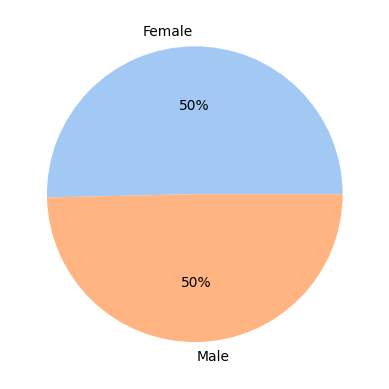

In [141]:
pie_color=sns.color_palette('pastel')
plt.pie(genderCount,labels=genderCount.index,colors=pie_color,autopct='%.0f%%')
plt.show()

In [142]:
smokingstatusC=df['smoking_status'].value_counts()
smokingstatusC

smoking_status
Passive Smoker    2538
Former Smoker     2499
Current Smoker    2483
Never Smoked      2480
Name: count, dtype: int64

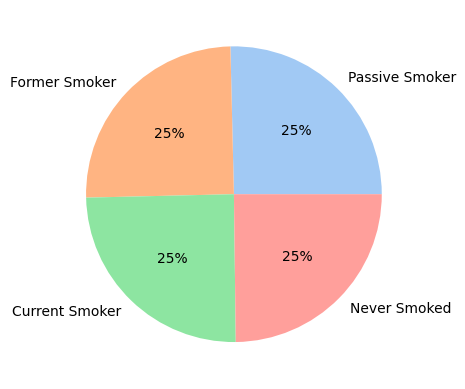

In [143]:
pie_color=sns.color_palette('pastel')
plt.pie(smokingstatusC,labels=smokingstatusC.index,colors=pie_color,autopct='%.0f%%')
plt.show()

In [144]:
treatmenttypeC=df['treatment_type'].value_counts()
treatmenttypeC

treatment_type
Radiation       2552
Chemotherapy    2516
Surgery         2502
Combined        2430
Name: count, dtype: int64

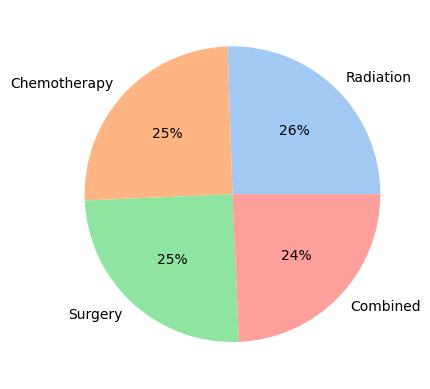

In [145]:
pie_color=sns.color_palette('pastel')
plt.pie(treatmenttypeC,labels=treatmenttypeC.index,colors=pie_color,autopct='%.0f%%')
plt.show()

In [146]:
countryC=df['country'].value_counts()
countryC

country
Netherlands       435
Malta             403
Sweden            398
Bulgaria          394
Denmark           389
Poland            388
Estonia           386
Romania           384
Belgium           379
Finland           374
Germany           371
Croatia           370
Austria           364
Luxembourg        364
Portugal          363
Hungary           363
Italy             363
Lithuania         362
Czech Republic    358
Slovenia          357
Latvia            355
Ireland           352
Spain             352
Cyprus            351
Greece            346
Slovakia          345
France            334
Name: count, dtype: int64

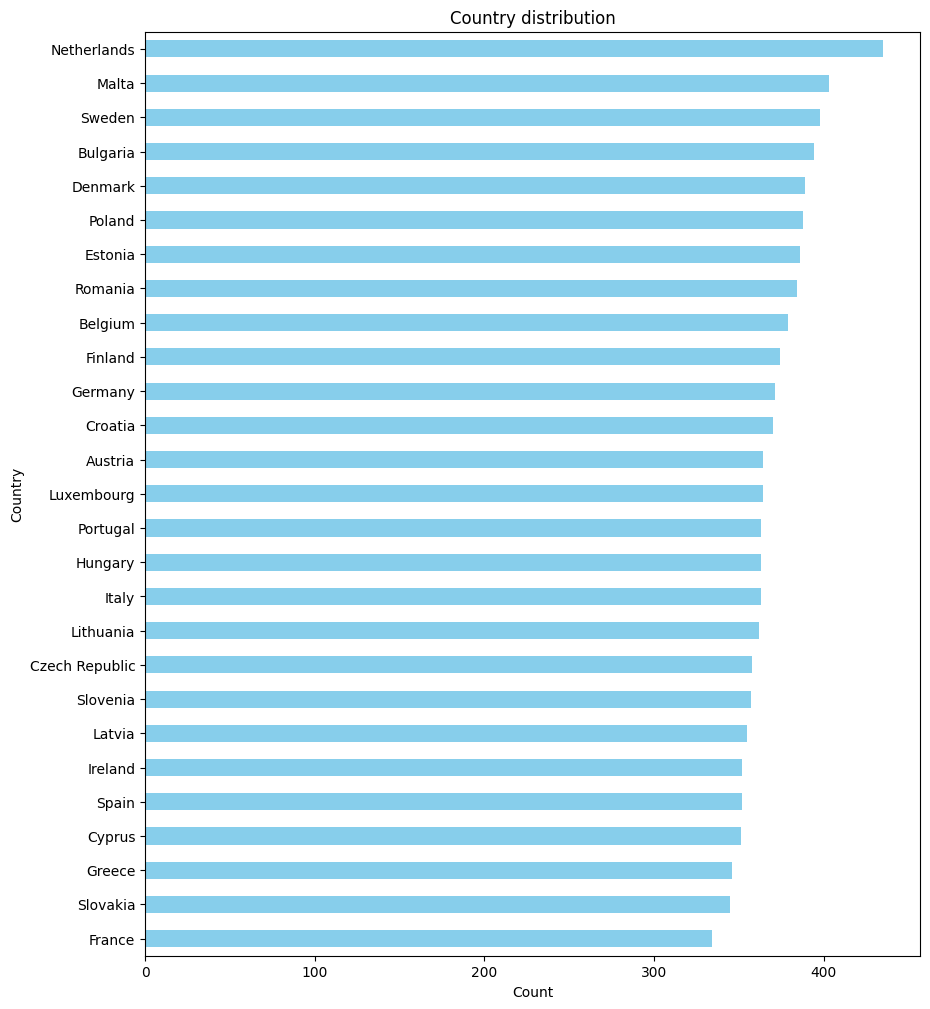

In [147]:
plt.figure(figsize=(10, 12))
countryC.plot(kind='barh', color='skyblue')

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Country distribution')
plt.gca().invert_yaxis()

plt.show()

In [148]:
total_datasets = countryC.sum()
total_datasets

10000

In [149]:
df['family_history'] = df['family_history'].replace({'Yes': 1, 'No': 0})
df

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,1,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,0,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,1,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,1,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,50.0,Male,Finland,2023-01-04,Stage II,2023-01-12,1,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,Female,Portugal,2015-10-02,Stage I,2015-10-08,0,Passive Smoker,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,52.0,Female,Croatia,2022-11-12,Stage I,2022-11-30,0,Current Smoker,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,69.0,Male,Estonia,2021-03-25,Stage III,2021-03-28,1,Never Smoked,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,70.0,Male,Netherlands,2022-02-11,Stage II,2022-02-27,0,Former Smoker,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [150]:
unique_values = df['cancer_stage'].unique()
unique_values

array(['Stage III', 'Stage IV', 'Stage I', 'Stage II'], dtype=object)

In [151]:
stage_mapping = {
    'Stage I': 1,
    'Stage II': 2,
    'Stage III': 3,
    'Stage IV': 4
}

df['cancer_stage'] = df['cancer_stage'].replace(stage_mapping)
df

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,Male,Czech Republic,2023-04-22,3,2023-05-02,1,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,65.0,Male,Romania,2023-04-07,4,2023-04-12,0,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,51.0,Female,Latvia,2016-02-07,3,2016-02-13,1,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,37.0,Male,Greece,2023-12-01,1,2023-12-03,1,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,50.0,Male,Finland,2023-01-04,2,2023-01-12,1,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,Female,Portugal,2015-10-02,1,2015-10-08,0,Passive Smoker,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,52.0,Female,Croatia,2022-11-12,1,2022-11-30,0,Current Smoker,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,69.0,Male,Estonia,2021-03-25,3,2021-03-28,1,Never Smoked,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,70.0,Male,Netherlands,2022-02-11,2,2022-02-27,0,Former Smoker,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [152]:
smoking_status_mapping = {
    'Never Smoked': 0,
    'Current Smoker': 1,
    'Former Smoker': 2,
    'Passive Smoker': 3
}
df['smoking_status'] = df['smoking_status'].replace(smoking_status_mapping)
df

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,Male,Czech Republic,2023-04-22,3,2023-05-02,1,3,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,65.0,Male,Romania,2023-04-07,4,2023-04-12,0,0,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,51.0,Female,Latvia,2016-02-07,3,2016-02-13,1,2,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,37.0,Male,Greece,2023-12-01,1,2023-12-03,1,0,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,50.0,Male,Finland,2023-01-04,2,2023-01-12,1,0,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,Female,Portugal,2015-10-02,1,2015-10-08,0,3,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,52.0,Female,Croatia,2022-11-12,1,2022-11-30,0,1,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,69.0,Male,Estonia,2021-03-25,3,2021-03-28,1,0,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,70.0,Male,Netherlands,2022-02-11,2,2022-02-27,0,2,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [153]:
gender_mapping = {
    'Female': 0,
    'Male': 1
}
df['gender'] = df['gender'].replace(gender_mapping)
df

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,1,Czech Republic,2023-04-22,3,2023-05-02,1,3,25.9,208,1,0,0,0,Radiation,2024-04-25,0
1,65.0,1,Romania,2023-04-07,4,2023-04-12,0,0,18.9,193,0,0,0,0,Surgery,2025-03-11,0
2,51.0,0,Latvia,2016-02-07,3,2016-02-13,1,2,34.6,249,1,1,1,0,Surgery,2017-04-14,1
3,37.0,1,Greece,2023-12-01,1,2023-12-03,1,0,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
4,50.0,1,Finland,2023-01-04,2,2023-01-12,1,0,32.6,300,1,1,0,0,Radiation,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0,Portugal,2015-10-02,1,2015-10-08,0,3,24.9,233,1,1,0,0,Chemotherapy,2016-12-04,0
9996,52.0,0,Croatia,2022-11-12,1,2022-11-30,0,1,16.5,153,1,0,0,0,Radiation,2024-08-01,1
9997,69.0,1,Estonia,2021-03-25,3,2021-03-28,1,0,20.5,187,0,0,0,0,Radiation,2022-10-29,1
9998,70.0,1,Netherlands,2022-02-11,2,2022-02-27,0,2,23.2,188,1,1,1,0,Radiation,2023-07-01,0


In [154]:
treatment_type_mapping = {
    'Radiation': 1,
    'Chemotherapy': 2,
    'Surgery': 3,
    'Combined': 4
}

df['treatment_type'] = df['treatment_type'].replace(treatment_type_mapping)
df

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,1,Czech Republic,2023-04-22,3,2023-05-02,1,3,25.9,208,1,0,0,0,1,2024-04-25,0
1,65.0,1,Romania,2023-04-07,4,2023-04-12,0,0,18.9,193,0,0,0,0,3,2025-03-11,0
2,51.0,0,Latvia,2016-02-07,3,2016-02-13,1,2,34.6,249,1,1,1,0,3,2017-04-14,1
3,37.0,1,Greece,2023-12-01,1,2023-12-03,1,0,40.2,262,0,0,0,0,2,2024-09-20,0
4,50.0,1,Finland,2023-01-04,2,2023-01-12,1,0,32.6,300,1,1,0,0,1,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0,Portugal,2015-10-02,1,2015-10-08,0,3,24.9,233,1,1,0,0,2,2016-12-04,0
9996,52.0,0,Croatia,2022-11-12,1,2022-11-30,0,1,16.5,153,1,0,0,0,1,2024-08-01,1
9997,69.0,1,Estonia,2021-03-25,3,2021-03-28,1,0,20.5,187,0,0,0,0,1,2022-10-29,1
9998,70.0,1,Netherlands,2022-02-11,2,2022-02-27,0,2,23.2,188,1,1,1,0,1,2023-07-01,0


In [155]:
df = df.drop(columns=['country'])
df

,age,gender,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,50.0,1,2023-04-22,3,2023-05-02,1,3,25.9,208,1,0,0,0,1,2024-04-25,0
1,65.0,1,2023-04-07,4,2023-04-12,0,0,18.9,193,0,0,0,0,3,2025-03-11,0
2,51.0,0,2016-02-07,3,2016-02-13,1,2,34.6,249,1,1,1,0,3,2017-04-14,1
3,37.0,1,2023-12-01,1,2023-12-03,1,0,40.2,262,0,0,0,0,2,2024-09-20,0
4,50.0,1,2023-01-04,2,2023-01-12,1,0,32.6,300,1,1,0,0,1,2024-03-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0,2015-10-02,1,2015-10-08,0,3,24.9,233,1,1,0,0,2,2016-12-04,0
9996,52.0,0,2022-11-12,1,2022-11-30,0,1,16.5,153,1,0,0,0,1,2024-08-01,1
9997,69.0,1,2021-03-25,3,2021-03-28,1,0,20.5,187,0,0,0,0,1,2022-10-29,1
9998,70.0,1,2022-02-11,2,2022-02-27,0,2,23.2,188,1,1,1,0,1,2023-07-01,0


In [156]:
df['beginning_of_treatment_date'] = pd.to_datetime(df['beginning_of_treatment_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
df['duration'] = (df['end_treatment_date'] - df['beginning_of_treatment_date']).dt.days
df

,age,gender,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,duration
0,50.0,1,2023-04-22,3,2023-05-02,1,3,25.9,208,1,0,0,0,1,2024-04-25,0,359
1,65.0,1,2023-04-07,4,2023-04-12,0,0,18.9,193,0,0,0,0,3,2025-03-11,0,699
2,51.0,0,2016-02-07,3,2016-02-13,1,2,34.6,249,1,1,1,0,3,2017-04-14,1,426
3,37.0,1,2023-12-01,1,2023-12-03,1,0,40.2,262,0,0,0,0,2,2024-09-20,0,292
4,50.0,1,2023-01-04,2,2023-01-12,1,0,32.6,300,1,1,0,0,1,2024-03-11,0,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0,2015-10-02,1,2015-10-08,0,3,24.9,233,1,1,0,0,2,2016-12-04,0,423
9996,52.0,0,2022-11-12,1,2022-11-30,0,1,16.5,153,1,0,0,0,1,2024-08-01,1,610
9997,69.0,1,2021-03-25,3,2021-03-28,1,0,20.5,187,0,0,0,0,1,2022-10-29,1,580
9998,70.0,1,2022-02-11,2,2022-02-27,0,2,23.2,188,1,1,1,0,1,2023-07-01,0,489


In [157]:
df = df.drop(columns=['diagnosis_date','beginning_of_treatment_date','end_treatment_date'])
df

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,duration
0,50.0,1,3,1,3,25.9,208,1,0,0,0,1,0,359
1,65.0,1,4,0,0,18.9,193,0,0,0,0,3,0,699
2,51.0,0,3,1,2,34.6,249,1,1,1,0,3,1,426
3,37.0,1,1,1,0,40.2,262,0,0,0,0,2,0,292
4,50.0,1,2,1,0,32.6,300,1,1,0,0,1,0,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61.0,0,1,0,3,24.9,233,1,1,0,0,2,0,423
9996,52.0,0,1,0,1,16.5,153,1,0,0,0,1,1,610
9997,69.0,1,3,1,0,20.5,187,0,0,0,0,1,1,580
9998,70.0,1,2,0,2,23.2,188,1,1,1,0,1,0,489


In [158]:
df.describe()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,duration
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.767300,0.496500,2.512400,0.492900,1.509500,30.516040,233.29950,0.752000,0.468600,0.219900,0.086500,2.481000,0.215300,447.231800
std,10.032378,0.500013,1.121861,0.499975,1.119658,8.369464,43.79629,0.431873,0.499038,0.414199,0.281115,1.116317,0.411051,138.184811
min,18.000000,0.000000,1.000000,0.000000,0.000000,16.000000,150.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,159.000000
25%,48.000000,0.000000,2.000000,0.000000,1.000000,23.300000,195.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,355.000000
50%,55.000000,0.000000,3.000000,0.000000,2.000000,30.500000,242.00000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,449.000000
75%,62.000000,1.000000,4.000000,1.000000,3.000000,37.700000,271.00000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,538.000000
max,93.000000,1.000000,4.000000,1.000000,3.000000,45.000000,300.00000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,728.000000


In [93]:
from sklearn.preprocessing import StandardScaler

In [159]:
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]

In [160]:
features = ['age', 'gender','cancer_stage', 'family_history', 'smoking_status','bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type']

In [161]:
scaler = StandardScaler()
survived_scaled = scaler.fit_transform(survived[features])
not_survived_scaled = scaler.transform(not_survived[features])

In [162]:
agg_survived = survived_scaled.mean(axis=0)
agg_not_survived = not_survived_scaled.mean(axis=0)

In [163]:
def create_radar_chart(data, title, color):
    labels = features
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data = data.tolist()
    data += data[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color=color, alpha=0.25)
    ax.plot(angles, data, color=color, linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    plt.title(title, size=20, color=color, y=1.1)
    plt.show()

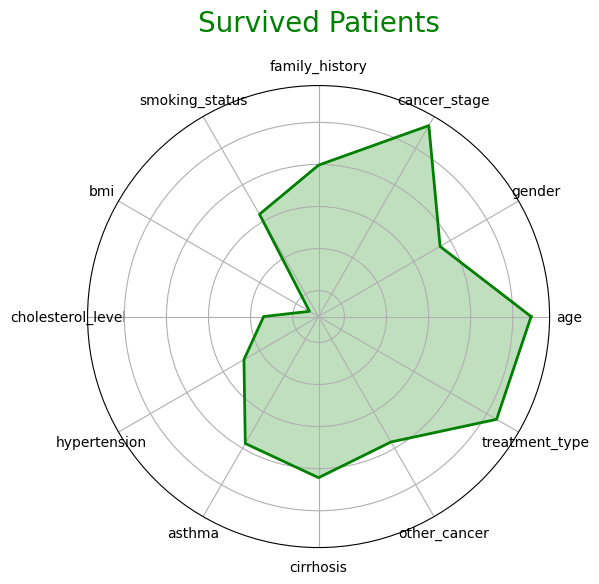

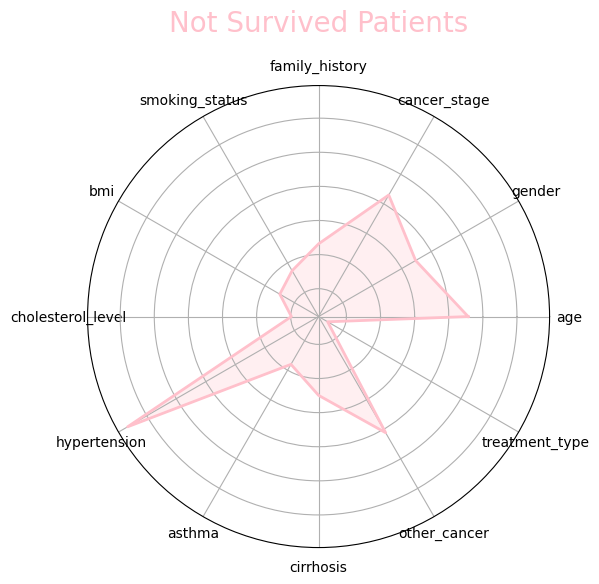

In [164]:
create_radar_chart(agg_survived, 'Survived Patients', 'green')
create_radar_chart(agg_not_survived, 'Not Survived Patients', 'pink')

In [59]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=f70ee1c0a8b9f80a3d91e75a004ef99e9c68b3beddca4134413079e61b857eaf
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [87]:
from lifelines import KaplanMeierFitter

In [165]:
treatment_groups = df.groupby('treatment_type')

In [166]:
kmf = KaplanMeierFitter()

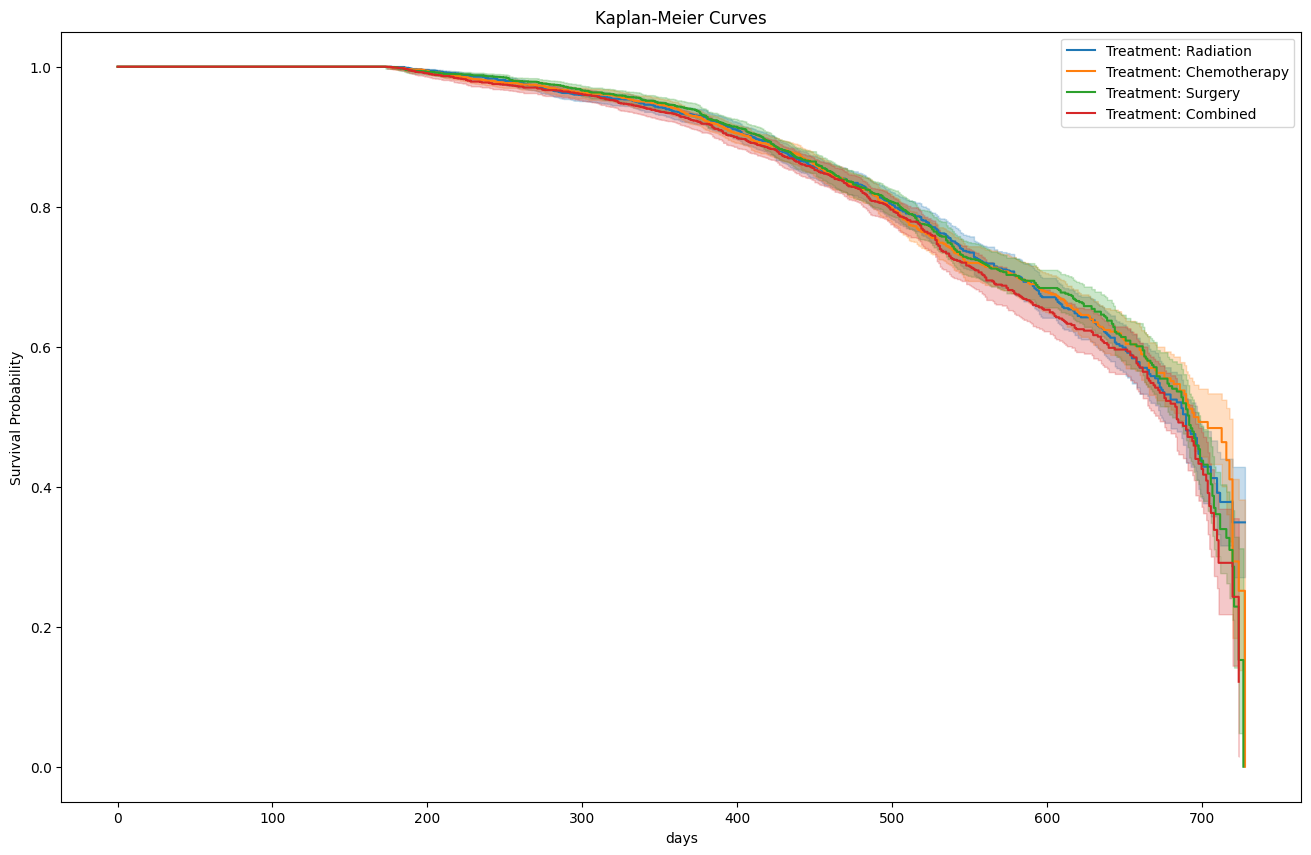

In [167]:
plt.figure(figsize=(16, 10))

for name, group in treatment_groups:
    kmf.fit(group['duration'], event_observed=group['survived'], label=f"Treatment: {list(treatment_type_mapping.keys())[name-1]}")
    kmf.plot()

plt.title('Kaplan-Meier Curves')
plt.xlabel('days')
plt.ylabel('Survival Probability')
plt.legend()

plt.show()

In [86]:
from lifelines import CoxPHFitter

In [176]:
cph = CoxPHFitter()
cph.fit(df, duration_col='duration', event_col='survived')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10000 total observations, 7847 right-censored observations>
             duration col = 'duration'
                event col = 'survived'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2153
   partial log-likelihood = -17622.83
         time fit was run = 2024-06-09 00:55:39 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
age                -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
gender              0.04       1.04       0.04            -0.05             0.12                 0.95                 1.13
cancer_stage        0.18       1.20       0.02             0.14             0.22                 1.15                 1.25
family_history     -0.00       1.00       0.04            -0.09             0.08                 0.92                 1.09
smoking_status      0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
bmi                 0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
cholesterol_level   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
hypertension       -0.08       0.92       0.05            -0.18             0.02                 0.83                 1.02
asthma              0.04       1.04       0.04            -0.05             0.13                 0.96                 1.13
cirrhosis           0.03       1.03       0.05            -0.08             0.13                 0.93                 1.14
other_cancer       -0.01       0.99       0.08            -0.16             0.15                 0.85                 1.16
treatment_type      0.03       1.03       0.02            -0.01             0.07                 0.99                 1.07

                    cmp to     z      p   -log2(p)
covariate                                         
age                   0.00 -0.50   0.62       0.70
gender                0.00  0.84   0.40       1.31
cancer_stage          0.00  9.31 <0.005      66.13
family_history        0.00 -0.01   0.99       0.02
smoking_status        0.00  0.09   0.92       0.11
bmi                   0.00  0.32   0.75       0.41
cholesterol_level     0.00  0.51   0.61       0.71
hypertension          0.00 -1.66   0.10       3.36
asthma                0.00  0.91   0.36       1.46
cirrhosis             0.00  0.50   0.62       0.70
other_cancer          0.00 -0.07   0.94       0.08
treatment_type        0.00  1.44   0.15       2.74
---
Concordance = 0.58
Partial AIC = 35269.66
log-likelihood ratio test = 94.21 on 12 df
-log2(p) of ll-ratio test = 46.92

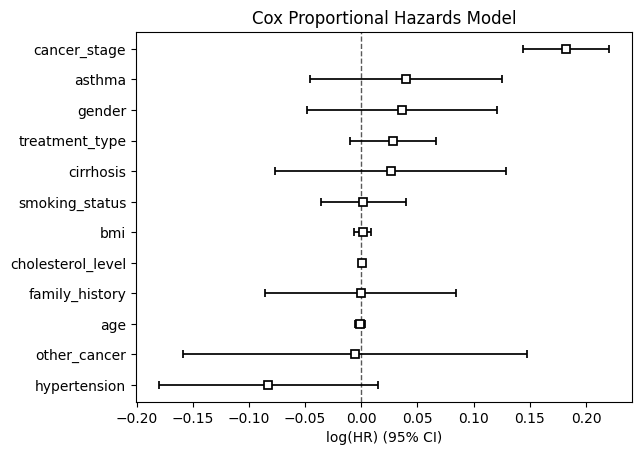

In [175]:
cph.plot()
plt.title("Cox Proportional Hazards Model")
plt.show()